In [29]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [30]:
df = pd.read_csv("../data/datasets/miami/miami.csv",index_col='timestamp')
df.index = pd.to_datetime(df.index, unit="s")
df.head(5)

,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_coverage,weather_category,weather_description
timestamp,,,,,,,,,,,
2023-02-28 19:00:00,30.58,31.42,1016,47,29.44,32.23,9.648,210,20,Clouds,Clouds
2023-02-28 20:00:00,30.76,31.86,1015,48,28.90,32.23,8.064,0,20,Clouds,Clouds
2023-02-28 21:00:00,30.20,32.23,1015,55,28.32,32.23,9.648,250,20,Clouds,Clouds
2023-02-28 22:00:00,29.05,30.96,1015,59,27.21,31.68,14.832,240,0,Clear,Clear
2023-02-28 23:00:00,27.45,28.85,1016,62,26.00,30.01,16.092,250,0,Clear,Clear


temp                float64
timestamp    datetime64[ns]
dtype: object

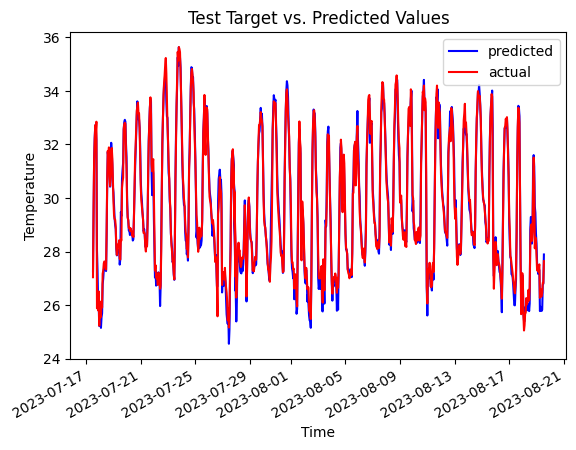

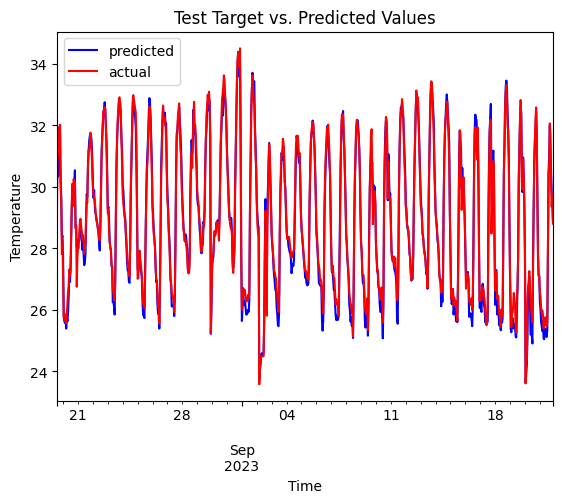

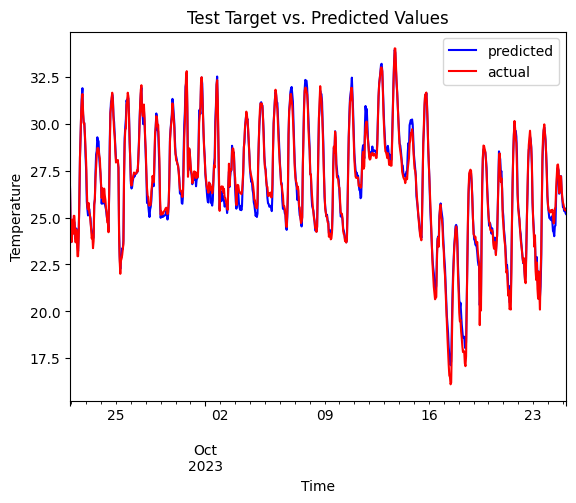

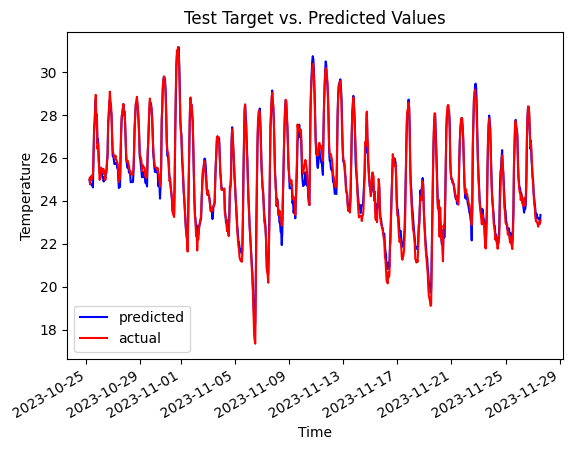

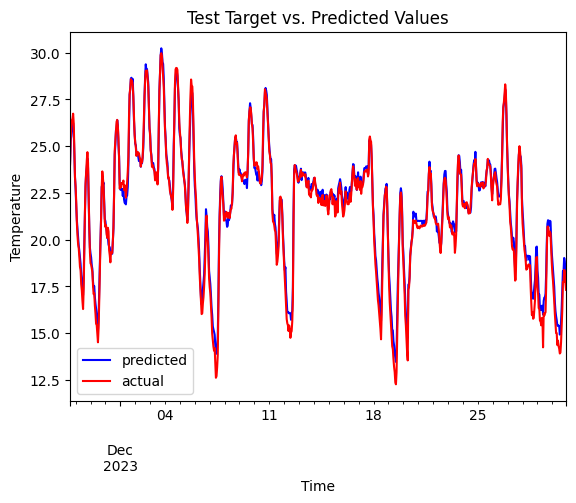

Average MSE: 0.1253335602439124


In [57]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from math import floor


X = df[['feels_like', 'pressure', 'humidity', 'temp_min',	'temp_max', 'wind_speed']]
y = df['temp']

X.count()
cld = linear_model.ARDRegression()

scores = []
tscv = TimeSeriesSplit(test_size=800)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    cld.fit(X_train, y_train)

    y_pred = cld.predict(X_test)
    predictions = pd.DataFrame({"index": df.iloc[test_index].index,"actual": y.iloc[test_index], "predicted": y_pred})
    predictions.plot(x="index", y=['predicted', 'actual'], style=['b-', 'r-'])
    plt.title('Test Target vs. Predicted Values')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.show()
    
    scores.append(mean_squared_error(y_test, y_pred))

avg_mse = np.mean(scores)
print("Average MSE:", avg_mse)

